In [55]:
import numpy as np
import pandas as pd
import re
import preprocessing as pu
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [56]:
df=pd.read_csv('dataset/train.csv',parse_dates=True)
pd.set_option('display.max_columns', None)

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4


In [59]:
df['Date_of_creation']=pd.to_datetime(df['Date_of_creation'].values,format='%Y-%m-%d')

<AxesSubplot:>

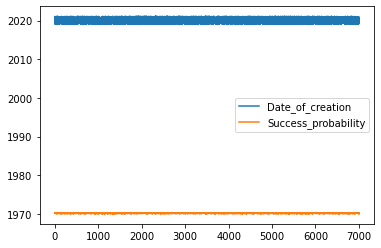

In [60]:
df[['Date_of_creation','Success_probability']].plot.line()

In [61]:
a=pd.DataFrame(df['Success_probability'].values,index=df['Date_of_creation'],columns=['Success_proabability'])

In [62]:
a.head()

,Success_proabability
Date_of_creation,
2020-03-29,73.6
2019-07-10,58.9
2019-07-27,68.8
2021-01-30,64.5
2019-05-22,62.4


In [63]:
a.head()

,Success_proabability
Date_of_creation,
2020-03-29,73.6
2019-07-10,58.9
2019-07-27,68.8
2021-01-30,64.5
2019-05-22,62.4


In [64]:
monthly=a.resample(rule='M').mean()

Text(0, 0.5, 'Success_Probability')

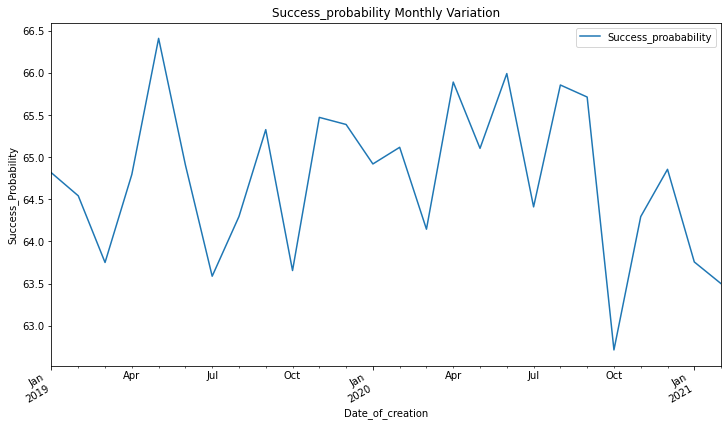

In [65]:
monthly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability Monthly Variation')
plt.ylabel('Success_Probability')

In [66]:
weekly=a.resample(rule='W').mean()

Text(0, 0.5, 'Success_Probability')

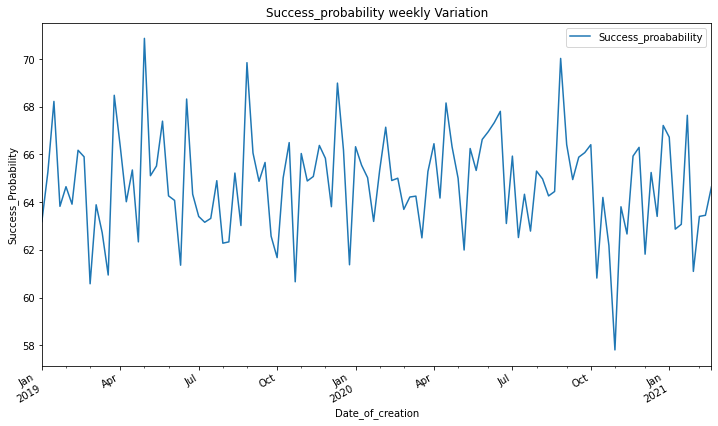

In [67]:
weekly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability weekly Variation')
plt.ylabel('Success_Probability')

In [68]:
yearly=a.resample(rule='A').mean()

Text(0, 0.5, 'Success_Probability')

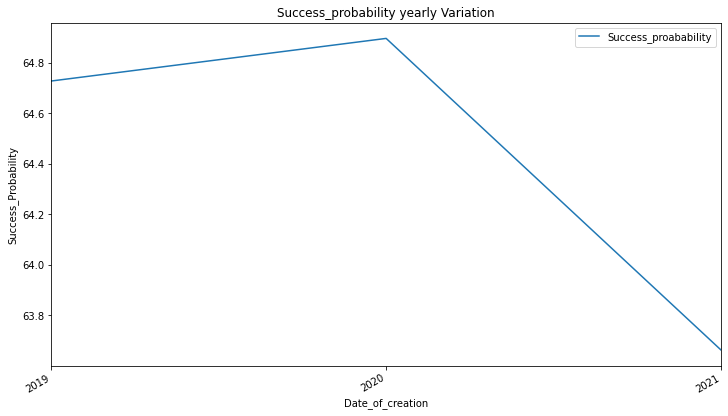

In [69]:
yearly.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability yearly Variation')
plt.ylabel('Success_Probability')

In [70]:
Bussiness_monthend=a.resample(rule='BM').mean()

Text(0, 0.5, 'Success_Probability')

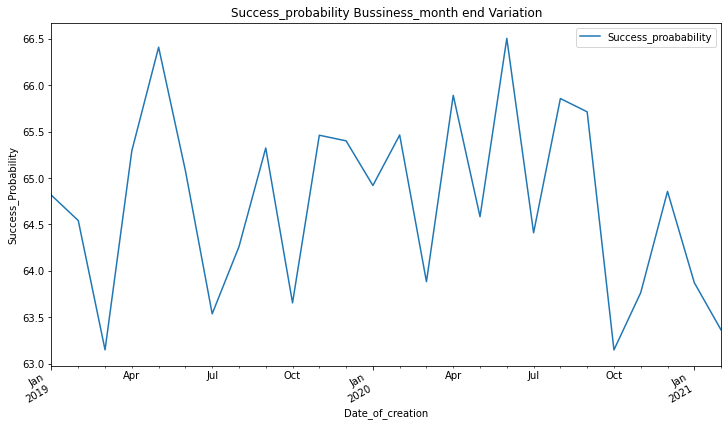

In [71]:
Bussiness_monthend.plot.line(subplots=True,figsize=(12,7))
plt.title('Success_probability Bussiness_month end Variation')
plt.ylabel('Success_Probability')

#### I am going to use month as a feature column

In [72]:
df['month']=pd.DatetimeIndex(df['Date_of_creation']).month
df['year']=pd.DatetimeIndex(df['Date_of_creation']).year
df['week']=pd.DatetimeIndex(df['Date_of_creation']).week

In [73]:
df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,month,year,week
0,TitleM5DZY,"Davis, Perkins and Bishop Inc",Restaurants,320506$,2067263.7$,2020-03-29,Product_2,607.447.7883,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,charlenewerner@davis.com,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,3,2020,13
1,TitleKIW18,Bender PLC LLC,Construction Services,39488$,240876.8$,2019-07-10,Product_2,892-938-9493,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,terrylogan@bender.com,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,7,2019,28
2,TitleFXSDN,Carter-Henry and Sons,Hospitals/Clinics,359392$,2407926.4$,2019-07-27,Product_1,538.748.2271,500 Million - 1 Billion,Category 4,USA,"Albany-Schenectady-Troy, NY",Ariel Hamilton,SVP/General Counsel,arielhamilton@carterhenry.com,Health service manager,Marketing Event,Level 1,?,"Georgakopoulos,Vasilios T",No,4,68.8,7,2019,30
3,TitlePSK4Y,Garcia Ltd Ltd,Real Estate,76774$,468321.4$,2021-01-30,Product_2,(692)052-1389x75188,500 Million - 1 Billion,Category 3,USA,"Mount Vernon-Anacortes, WA",Erin Wilson,CEO/Co-Founder/Chairman,erinwilson@garcia.com,"Therapist, speech and language",Contact Email,Level 2,Did not hear back after Level 1,"Brown,Maxine A",We have all the requirements,1,64.5,1,2021,4
4,Title904GV,Lee and Sons PLC,Financial Services,483896$,NaN,2019-05-22,Product_2,001-878-814-6134x015,50 - 100 Million,Category 3,India,Shimoga,kavita,Executive Vice President,mr.christopher@lee.com,Media planner,Website,Level 2,Up-to-date,"Thomas,Lori E",No,4,62.4,5,2019,21


## Checking Null Values

In [74]:
df.isnull().any()

Deal_title               False
Lead_name                False
Industry                  True
Deal_value                True
Weighted_amount           True
Date_of_creation         False
Pitch                    False
Contact_no               False
Lead_revenue             False
Fund_category            False
Geography                 True
Location                  True
POC_name                  True
Designation              False
Lead_POC_email           False
Hiring_candidate_role    False
Lead_source              False
Level_of_meeting         False
Last_lead_update          True
Internal_POC             False
Resource                  True
Internal_rating          False
Success_probability      False
month                    False
year                     False
week                     False
dtype: bool

## Checking Categorical features

In [75]:
for col in df.dtypes[df.dtypes == object].index:
    print('Unique items in column',col,'with count {} are {}:'.format(df[col].nunique(),df[col].unique()))
    print('-'*90)

Unique items in column Deal_title with count 7007 are ['TitleM5DZY' 'TitleKIW18' 'TitleFXSDN' ... 'TitleF1FWY' 'TitleXVBNJ'
 'TitleKXU3H']:
------------------------------------------------------------------------------------------
Unique items in column Lead_name with count 7007 are ['Davis, Perkins and Bishop Inc' 'Bender PLC LLC' 'Carter-Henry and Sons'
 ... 'Romero-Juarez PLC' 'Sullivan, Mooney and Elliott LLC'
 'Jones LLC and Sons']:
------------------------------------------------------------------------------------------
Unique items in column Industry with count 171 are ['Restaurants' 'Construction Services' 'Hospitals/Clinics' 'Real Estate'
 'Financial Services' 'Banks' 'Architecture/Engineering'
 'Education/Training' 'REIT' 'Healthcare Facilities/Services'
 'Hotels/Motels' 'Biotech/Healthcare' 'Services' 'Other Investment Firms'
 'Software' 'Other Biz Services' 'Materials/Manufacturing' 'Other'
 'Trucking' 'Automotive/Transportation' 'Constr - Supplies'
 'Casinos/Gaming' 'Food

In [76]:
for unique in df['POC_name'].unique():
    print(unique)

Charlene Werner
rakhi
Ariel Hamilton
Erin Wilson
kavita
kamla devi
Sara Dixon
Christian Stanley
Joseph Thompson
William Grimes
Tamara Sanchez
Frank Jones
Frank Ali
saaniya
rekha bai
Keith Patterson
Joshua Wright
Christopher Walter
manju
kiran devi
Sarah Woods
pinki
kirti
rani
George Francis
khusbu
ritu
Jennifer Davis
naina
santro
Candice Mcintyre
aarti
preeti bharti
Alex Le
komal
Anthony Armstrong
Tami Frost
Michelle Adams
Luis Young
Christopher Robles
William Kramer
smt dhapu
Mark Brown
kimmi@neelam
Patrick Simmons
Jennifer Hart
Jose Martin
Amy Stuart
Christopher Greer
Philip Richards
puja chauhan
pooja
Michael Lopez
usha
sona
anju devi
Jacob Montgomery
vinita
sonyi
Dr. Bryan Vargas
arpna pathak
preety
amreen
kushum
Melissa Meyer
Chris Casey
Cynthia Jones
Courtney Jackson
sitara
ramkali
uma
manisha
Mark Anderson
heena
Andrea Robertson
Scott Medina
vimala
vineeta
sakshi
William Rich
mamta
vijaya devi
Jessica Pitts
Amy Roy
lalita choudhry
Jeffrey Gray
sahawaj
riya masi
Robert Carroll
Je

Tyler Vang MD
richa
Jeanne Lawrence
Todd Cox
tara
shabnur
Evan Gray
sabnam
Chad Higgins
Donald Holland
Margaret Martin
Vicki Rios
roshni balai
nilam devi
Robert Thompson
Sheila Martinez
renu parcha
reenu
nekki
smt monika
kashish gupta @ hema gupta
Christopher Simmons
anjana
Devin Salazar
Daniel Hoffman
Leslie Wiley
gopi
Lauren Garcia
smt swati mishra
Dale Sandoval
Joshua Jackson
Ronald Rogers
rosina
Dawn Allen
bhawna @ noni
kiran meena
Jacob Campbell
Jessica Estes
Cynthia Smith
smt pooja
Mark Baker
Kim Henderson DDS
Janice Cruz
Karen Hubbard
Lindsey Smith
Kevin Gallegos
James Reyes
belo d/o
Thomas Ramos
Kaitlin Wilson
momina
Joshua Morgan
Glen Berry
Kari Jenkins
Deanna Hayes
sanju
Brandi Hart
bina jatav
veermati
Samantha Bartlett
Russell Taylor
Virginia Robinson
sayna parveen
chanchal @ mamta
Richard Schneider
Bradley Phillips
pushpa rani
Tina Wiggins
Luke Russell
Brittney Wilkins
alam aara
isika
Kenneth Miller
Jason Alexander
Frank Williams
Daniel Soto
deepa rani
Samuel Larson
kehkasa

Malik Lowe
Brandon Morgan
rajinder kaur
Christopher Jensen
Jim Briggs
kunti
Lindsey Mccarthy
Joel Fowler
Stephanie Dunn
Donna Harvey
Mr. Scott Rhodes
Janice Shelton
suman devi
Jessica Zamora
Leslie Martinez
Julia Gordon
Heather Thompson
Richard Green
Devin Robertson
David Weber
Richard Morgan
laxmi babu
Melissa Horton
Kyle Williams
Katherine Morales
Abigail Hamilton
Shannon Smith
reema jha
Veronica Young
jamnaa devi
Angela Nguyen
Misty Wilson
Louis Fox
Ryan Horton
Jerry Davis
raveena
Susan Mcclure
teena bhambi
naraini devi
meenu d/o
Matthew Dunn Jr.
mahzbin
Erica Turner
phulbi
Debra Yates
piyari
John Ramsey
samiksha  rathor
Melissa Davis
monini @ rupa
David Flores
Brandy Campos
mobsheera haider (shadiya)
Anthony Fowler
Sergio Miller
Kaitlin Cooley
mohseena biwi
Brittany Sanders
pooja shrama
Erica Lee
Tracey Morris
Jonathan Ortiz
Lisa Brandt
Marie Torres
Vanessa Cardenas
Monique Kent
Kenneth Howard
Christopher Brown
ramwati
Bruce Paul
Timothy Irwin
Dennis Brown
seeta
John Anderson
Chris

majida
Morgan Wilkerson
ridhima
rumal  kumari
Kyle Jackson
preeti  sharma
Jeffrey Floyd
kajal w/o sandeep
smt.nisha
April Thomas
juna d/o prem bahadur
Lisa Branch
babita sarkar
Danny Hunter
Timothy Patton
kanchan balai
Natalie Bauer
Nicholas Coleman
Matthew Roberts
David Lewis
Vanessa Coleman
Jenna Daniels
Alexander Woodard
Paul Stark
David Pollard
Timothy Ibarra
Angela Cox
Joseph Ortiz
Tiffany Boyd
Kimberly Moore
Calvin Cervantes
smt. sahjadi
heena praveen
John Reyes
Mrs. Cheryl Barber
arti kissko
Scott Miller
Jamie Moreno
Tracey Hamilton
John Lewis
Becky Estes
Jennifer Reyes
Randall Hill
sisty
shilpa rani
Benjamin Davis
mamtha
Morgan Martin
Debra Navarro
Philip Williams
salomi hemroda
Charles Young
zenab khan
Daniel Diaz
inderjeet kaur
Deborah Foster
geetanjali
Henry Hernandez
Patricia Clark
Caleb Thompson
Ryan Green
Amanda Peterson
Jonathan Taylor
Jean Barker
shashi @ kajal
Dana Jenkins
Alex Tran
deepanti
manvi
Desiree Kim
Catherine Duffy
Jessica Hutchinson
Michael Mora
Cassandra Ta

### Making Data more Clear for Analysis

In [77]:
def RemoveDollarSign(x):
    if type(x)==str:
        a=int(re.findall(r'\d+',x)[0])
        return a
    else:
        return x

In [78]:
df['Weighted_amount']=df['Weighted_amount'].apply(lambda x:RemoveDollarSign(x))
df['Deal_value']=df['Deal_value'].apply(lambda x:RemoveDollarSign(x))

In [79]:
df=df.drop(['Deal_title','Contact_no','Lead_POC_email'],axis=1)

In [80]:
df.head(2)

,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Lead_revenue,Fund_category,Geography,Location,POC_name,Designation,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability,month,year,week
0,"Davis, Perkins and Bishop Inc",Restaurants,320506.0,2067263.0,2020-03-29,Product_2,50 - 100 Million,Category 2,USA,"Killeen-Temple, TX",Charlene Werner,Executive Vice President,Community pharmacist,Website,Level 3,No track,"Davis,Sharrice A",NaN,3,73.6,3,2020,13
1,Bender PLC LLC,Construction Services,39488.0,240876.0,2019-07-10,Product_2,500 Million - 1 Billion,Category 4,India,Ratlam,rakhi,Chairman/CEO/President,Recruitment consultant,Others,Level 1,Did not hear back after Level 1,"Brown,Maxine A",No,5,58.9,7,2019,28


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7007 entries, 0 to 7006
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Lead_name              7007 non-null   object        
 1   Industry               7006 non-null   object        
 2   Deal_value             6956 non-null   float64       
 3   Weighted_amount        6482 non-null   float64       
 4   Date_of_creation       7007 non-null   datetime64[ns]
 5   Pitch                  7007 non-null   object        
 6   Lead_revenue           7007 non-null   object        
 7   Fund_category          7007 non-null   object        
 8   Geography              6035 non-null   object        
 9   Location               6996 non-null   object        
 10  POC_name               6999 non-null   object        
 11  Designation            7007 non-null   object        
 12  Hiring_candidate_role  7007 non-null   object        
 13  Lea

In [82]:
num_col=[col for col in df.columns if (df[col].dtype!='datetime64[ns]') and (df[col].dtype!='O')]
cat_col=list(set(df.columns)-set(num_col))

In [83]:
num_col

['Deal_value',
 'Weighted_amount',
 'Internal_rating',
 'Success_probability',
 'month',
 'year',
 'week']

In [84]:
df[num_col].isnull().any()

Deal_value              True
Weighted_amount         True
Internal_rating        False
Success_probability    False
month                  False
year                   False
week                   False
dtype: bool

<AxesSubplot:>

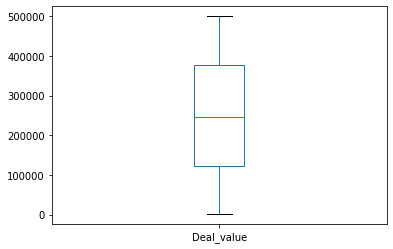

In [85]:
df['Deal_value'].plot.box()

<AxesSubplot:>

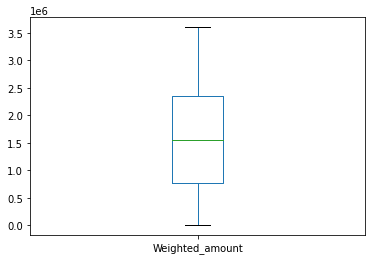

In [86]:
df['Weighted_amount'].plot.box()

In [87]:
## Handling Missing Numerical value
df['Deal_value']=df['Deal_value'].fillna(df['Deal_value'].mean())
df['Weighted_amount']=df['Weighted_amount'].fillna(df['Weighted_amount'].mean())

In [88]:
#df['Last_lead_update']=df['Last_lead_update'].apply(lambda x:None if x=='?' else x)

<AxesSubplot:xlabel='Resource', ylabel='count'>

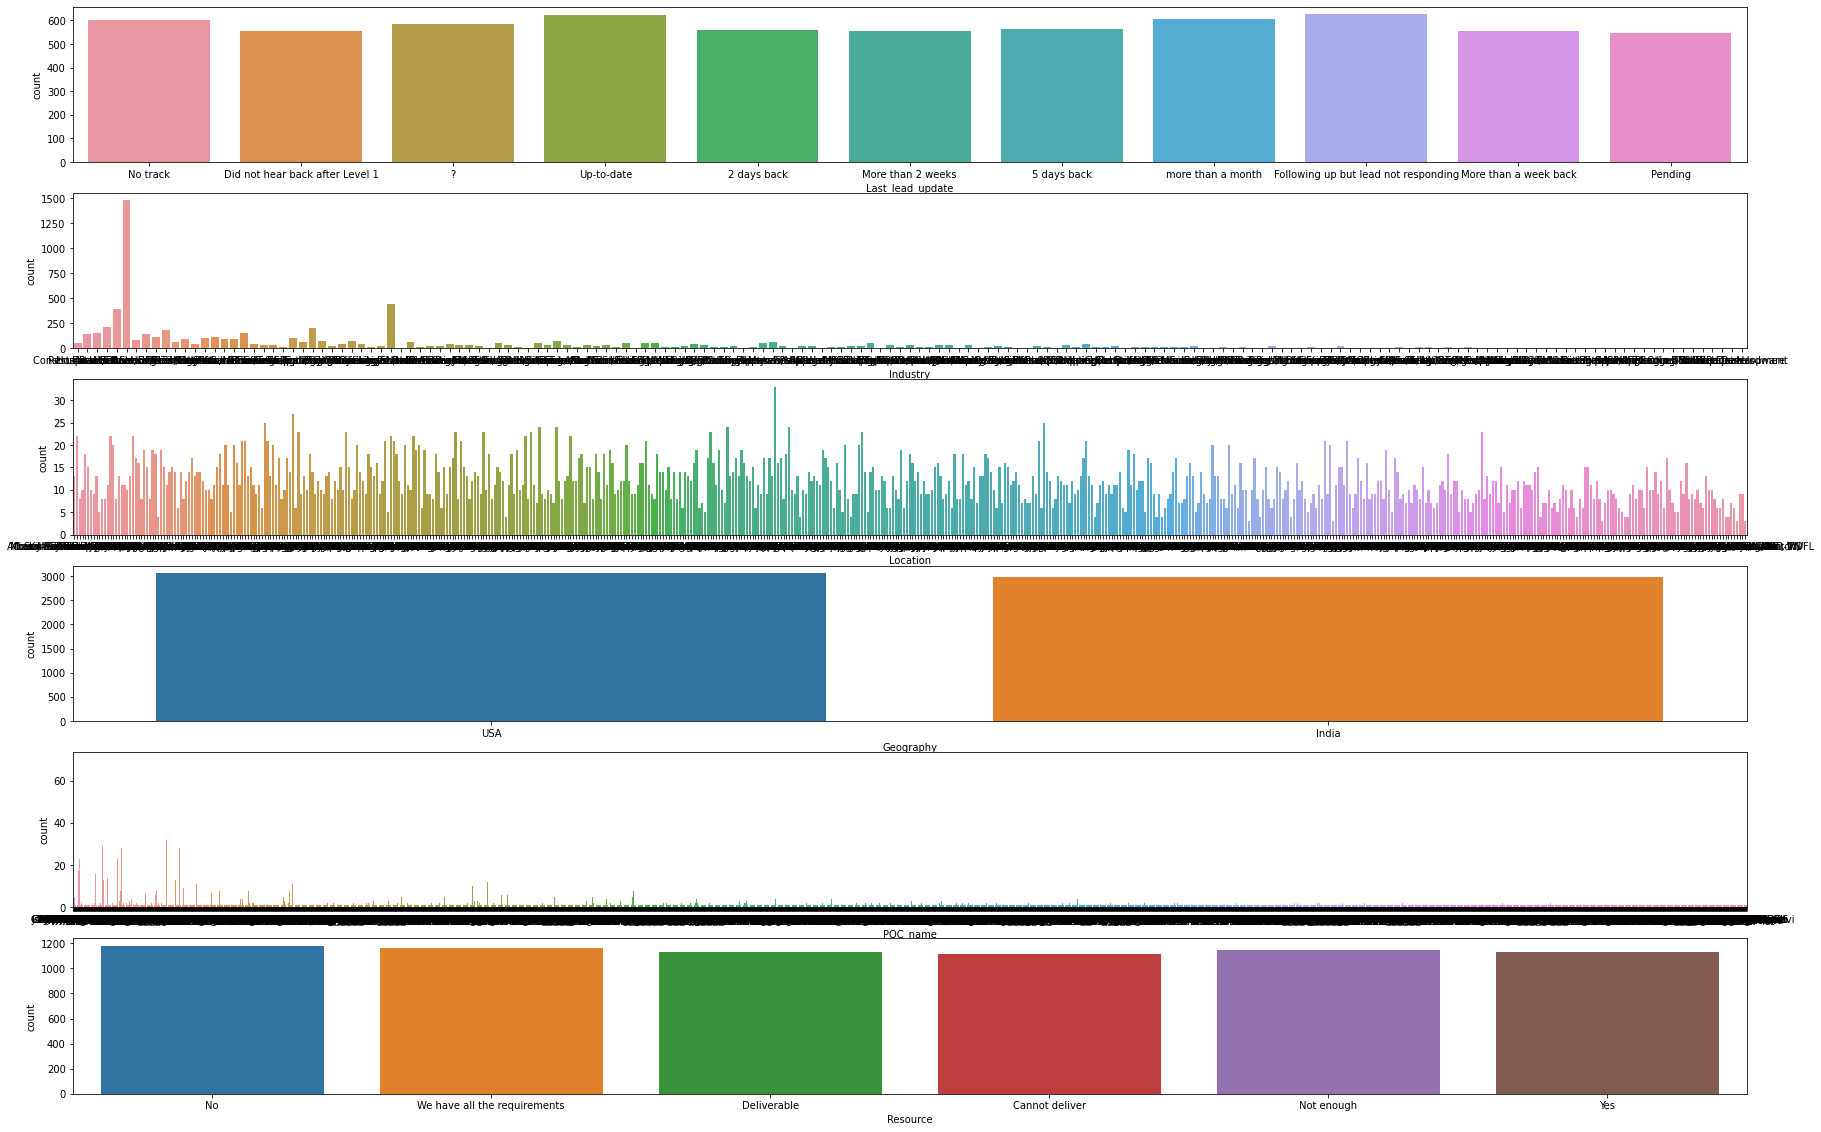

In [89]:
plt.figure(figsize=(30,20))
plt.subplot(6,1,1)
sns.countplot(df['Last_lead_update'])

plt.subplot(6,1,2)
sns.countplot(df['Industry'])

plt.subplot(6,1,3)
sns.countplot(df['Location'])

plt.subplot(6,1,4)
sns.countplot(df['Geography'])

plt.subplot(6,1,5)
sns.countplot(df['POC_name'])

plt.subplot(6,1,6)
sns.countplot(df['Resource'])


In [90]:
#Handling Missing Categorical columns
df['Last_lead_update']=df['Last_lead_update'].apply(lambda x:'Missing' if x=='?' else x)
df['Last_lead_update']=df['Last_lead_update'].fillna(df['Last_lead_update'].mode()[0])   # Need to tune it

df['Industry']=df['Industry'].fillna(df['Industry'].mode()[0])

df['Location']=df['Location'].fillna(df['Location'].mode()[0])

df['Geography']=df['Geography'].fillna(df['Geography'].mode()[0])

df['POC_name']=df['POC_name'].fillna(df['POC_name'].mode()[0])

df['Resource']=df['Resource'].fillna(df['Resource'].mode()[0])

<AxesSubplot:xlabel='Resource', ylabel='count'>

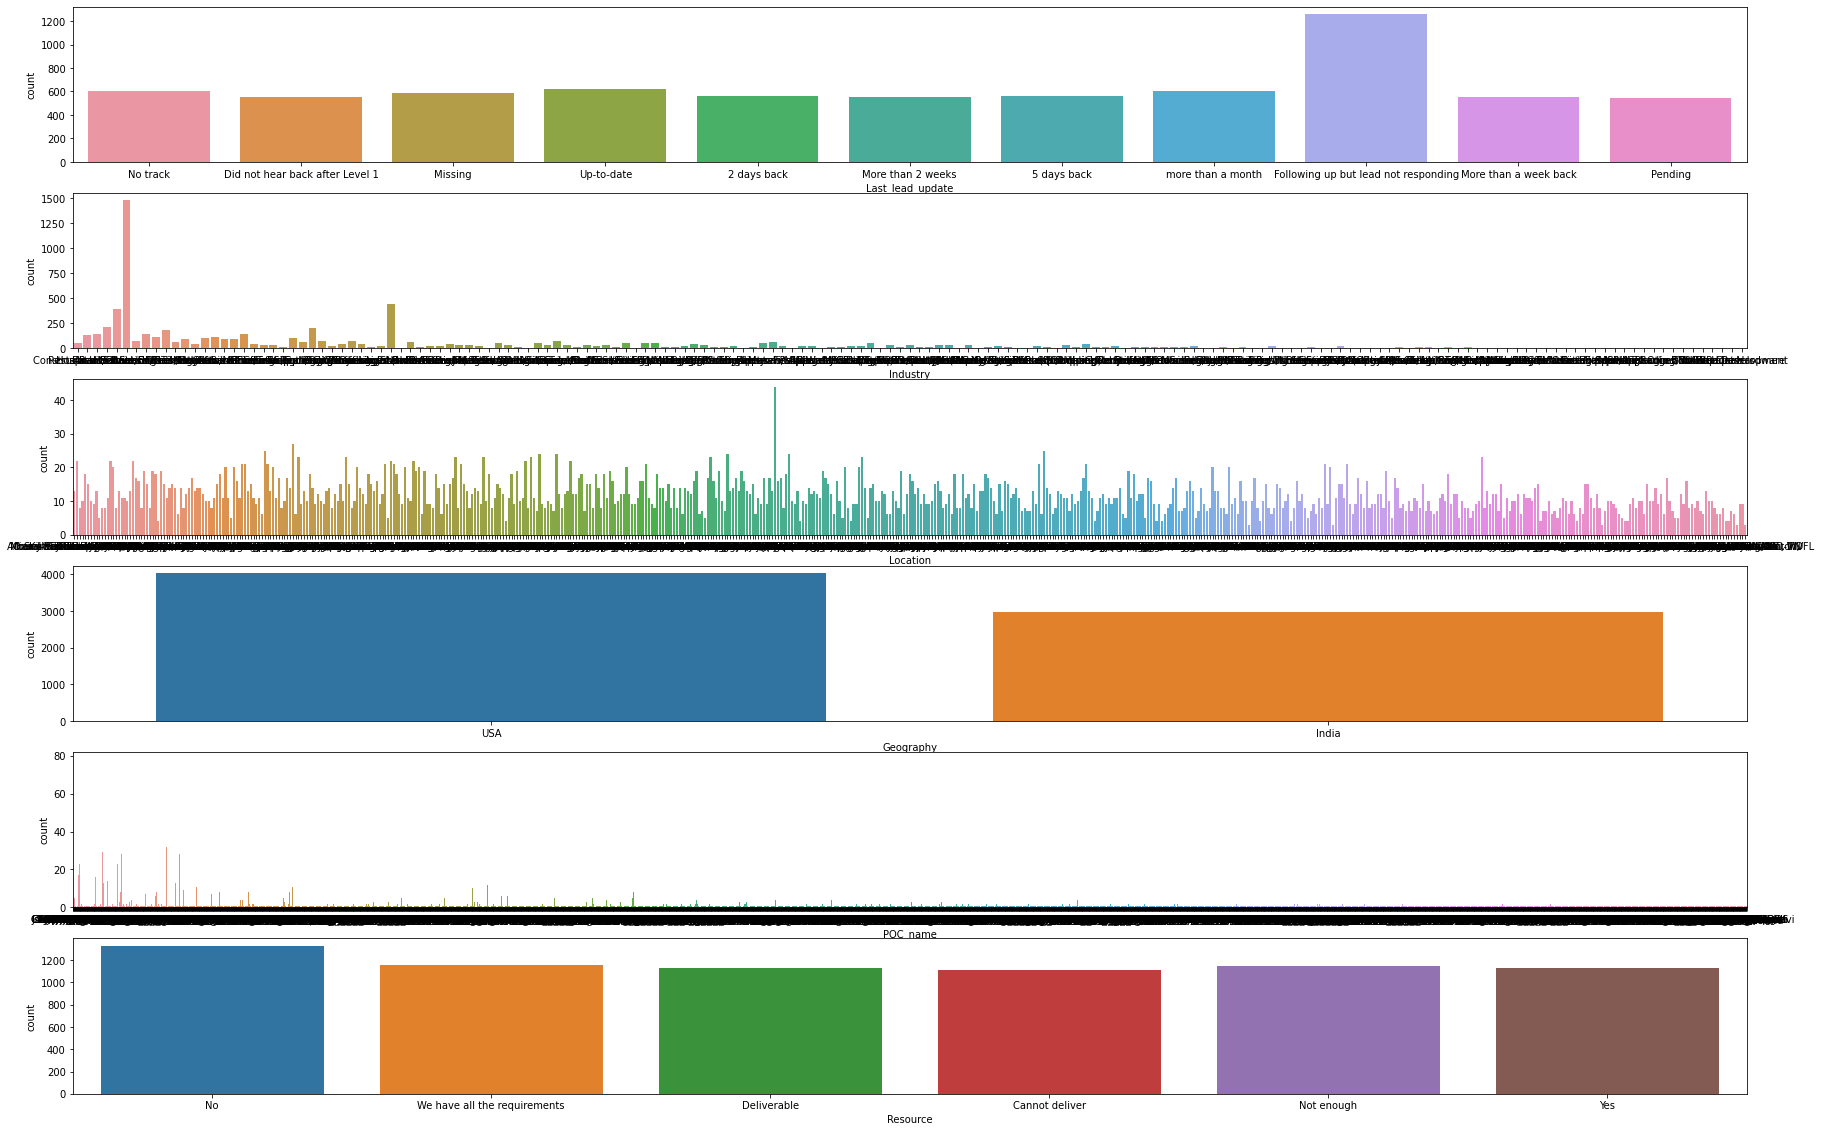

In [91]:
plt.figure(figsize=(30,20))
plt.subplot(6,1,1)
sns.countplot(df['Last_lead_update'])

plt.subplot(6,1,2)
sns.countplot(df['Industry'])

plt.subplot(6,1,3)
sns.countplot(df['Location'])

plt.subplot(6,1,4)
sns.countplot(df['Geography'])

plt.subplot(6,1,5)
sns.countplot(df['POC_name'])

plt.subplot(6,1,6)
sns.countplot(df['Resource'])


<AxesSubplot:ylabel='Density'>

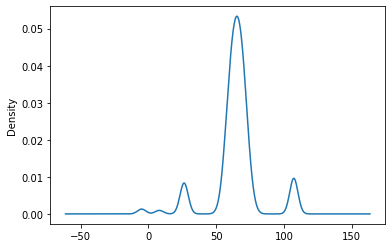

In [92]:
df['Success_probability'].plot.kde()

In [93]:
df.loc[df["Success_probability"]>100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 20 to 7002
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Lead_name              515 non-null    object        
 1   Industry               515 non-null    object        
 2   Deal_value             515 non-null    float64       
 3   Weighted_amount        515 non-null    float64       
 4   Date_of_creation       515 non-null    datetime64[ns]
 5   Pitch                  515 non-null    object        
 6   Lead_revenue           515 non-null    object        
 7   Fund_category          515 non-null    object        
 8   Geography              515 non-null    object        
 9   Location               515 non-null    object        
 10  POC_name               515 non-null    object        
 11  Designation            515 non-null    object        
 12  Hiring_candidate_role  515 non-null    object        
 13  Lea

In [94]:
df['Success_probability']=df['Success_probability'].apply(lambda x:100 if x>100 else x)
df['Success_probability']=df['Success_probability'].apply(lambda x:0 if x<0 else x)

<AxesSubplot:ylabel='Density'>

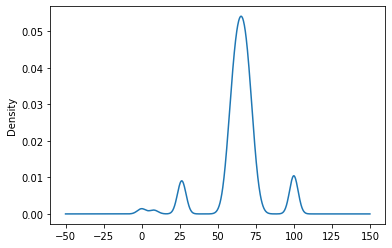

In [95]:
df['Success_probability'].plot.kde()

#### There is no Missing value in the Data

In [96]:
## For the time being- I am removing date columns from the dataset. I will consider while improving the model
df=df.drop(['Date_of_creation'],axis=1)  #Extracted Month from it

In [97]:
df_final, Encoders=pu.Cat2Num(df)

['Geography', 'Resource', 'Lead_source', 'Fund_category', 'Pitch']


In [98]:
df_final.head()

,Deal_value,month,week,Success_probability,Internal_rating,Weighted_amount,year,Geography_India,Geography_USA,Resource_Cannot deliver,Resource_Deliverable,Resource_No,Resource_Not enough,Resource_We have all the requirements,Resource_Yes,Lead_source_Contact Email,Lead_source_Marketing Event,Lead_source_Others,Lead_source_Website,Fund_category_Category 1,Fund_category_Category 2,Fund_category_Category 3,Fund_category_Category 4,Pitch_Product_1,Pitch_Product_2,Lead_revenue,Designation,Hiring_candidate_role,Level_of_meeting,Lead_name,Industry,POC_name,Location,Internal_POC,Last_lead_update
0,320506.0,3,13,73.6,3,2.067263e+06,2020,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,7,126,2,1386,119,568,292,12,7
1,39488.0,7,28,58.9,5,2.408760e+05,2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,4,501,0,411,31,4528,457,5,2
2,359392.0,7,30,68.8,4,2.407926e+06,2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,8,286,0,940,56,272,15,18,4
3,76774.0,1,4,64.5,1,4.683210e+05,2021,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,2,611,1,1943,114,1170,372,5,2
4,483896.0,5,21,62.4,4,1.569883e+06,2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,7,369,1,3477,46,3962,505,53,9


In [99]:
Encoders

{'L_enc_Lead_revenue': LabelEncoder(),
 'L_enc_Designation': LabelEncoder(),
 'L_enc_Hiring_candidate_role': LabelEncoder(),
 'L_enc_Level_of_meeting': LabelEncoder(),
 'L_enc_Lead_name': LabelEncoder(),
 'L_enc_Industry': LabelEncoder(),
 'L_enc_POC_name': LabelEncoder(),
 'L_enc_Location': LabelEncoder(),
 'L_enc_Internal_POC': LabelEncoder(),
 'L_enc_Last_lead_update': LabelEncoder(),
 'OH_enc_': OneHotEncoder(handle_unknown='ignore', sparse=False)}

## Distribution of data

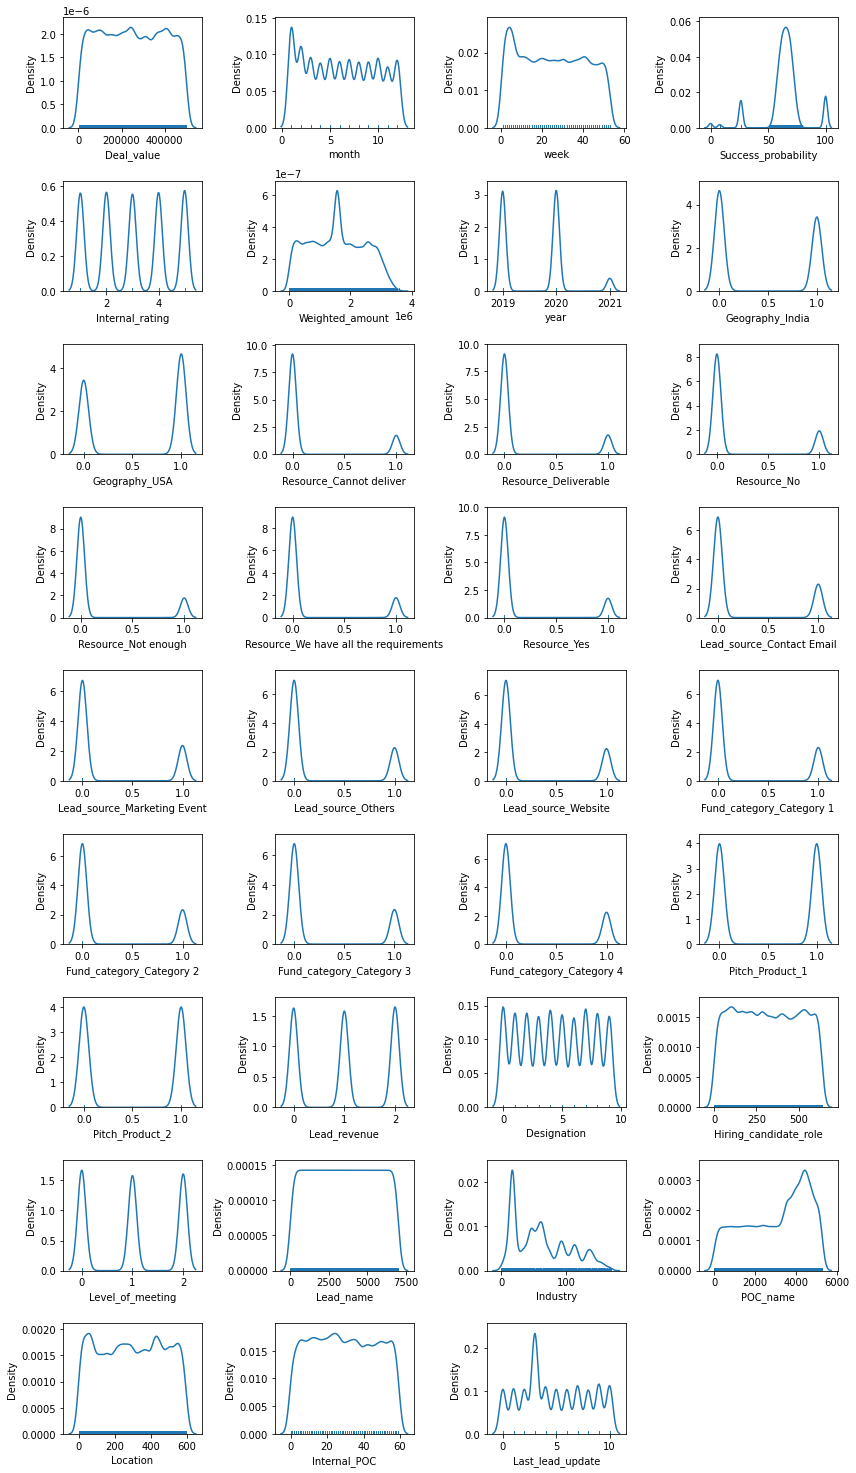

In [100]:
fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.distplot(df_final.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(df_final.columns[i])
plt.tight_layout()
plt.show()

## Univariate Analysis

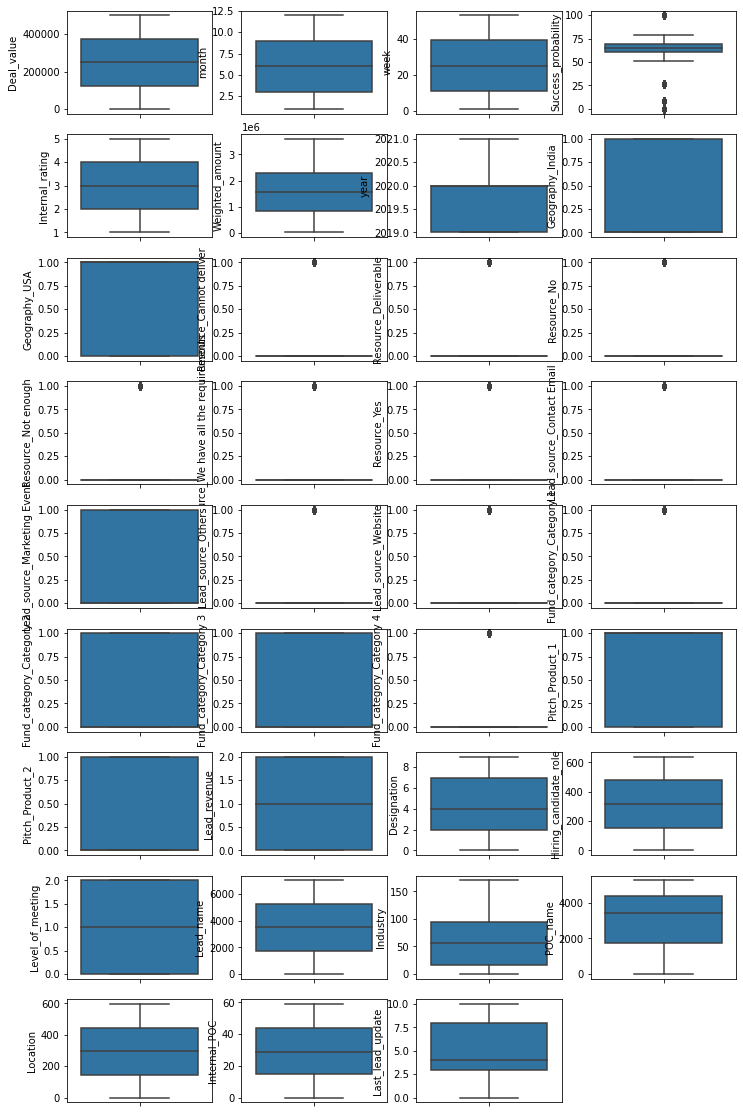

In [46]:
# Univariate Analysis: Box plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.boxplot(y=df_final.iloc[:,i])

## Bivariate Analysis: Bar plots (it will take time)

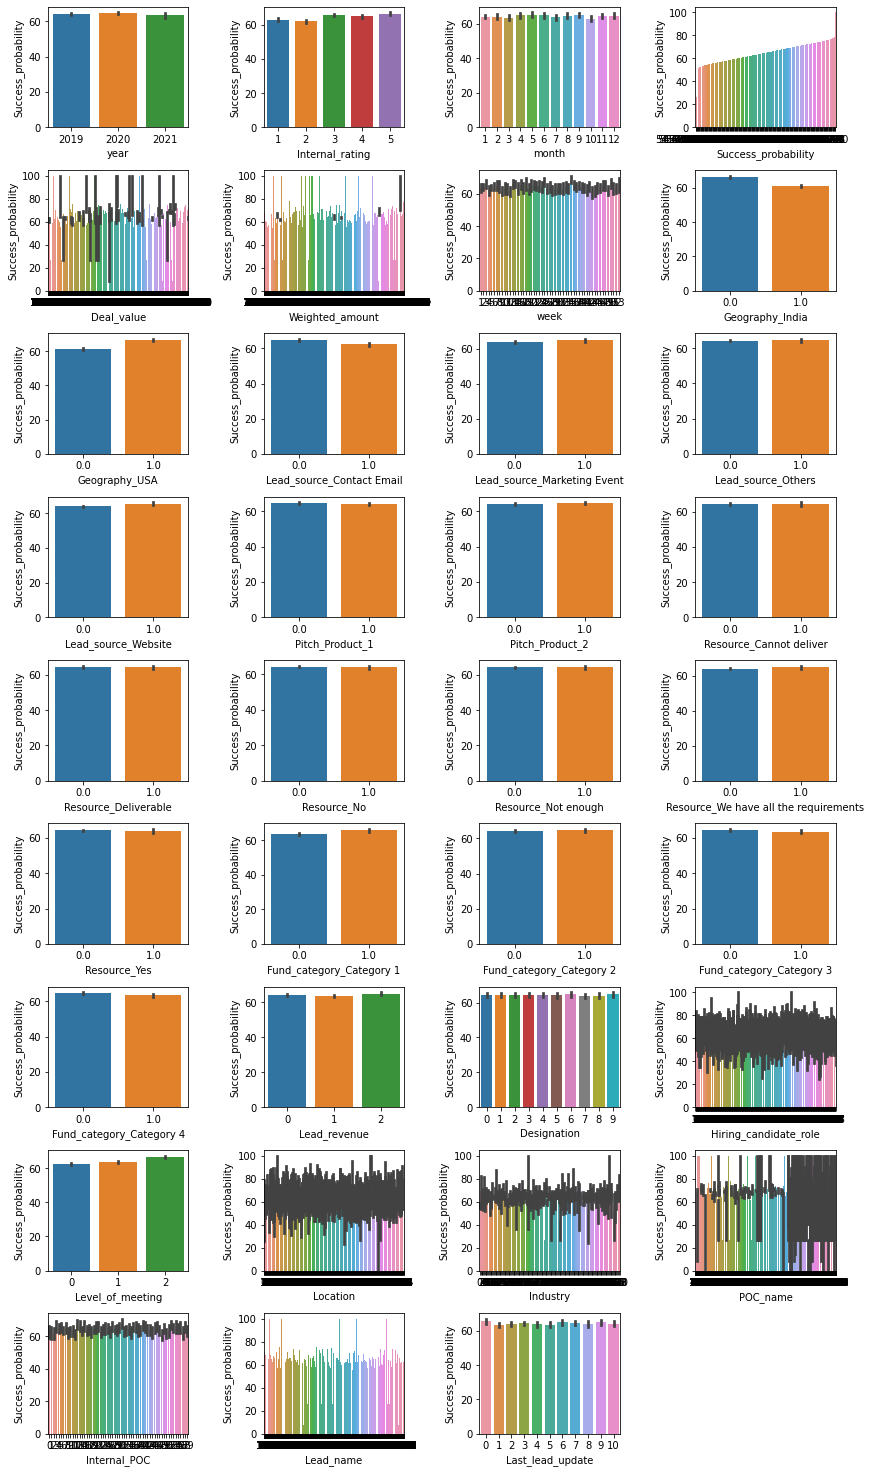

In [47]:
# Bivariate Analysis: Bar plots

fig = plt.figure(figsize=(12,36))
for i in range(len(df_final.columns)):
    fig.add_subplot(16,4,i+1)
    sns.barplot(x=df_final.iloc[:,i],y=df_final['Success_probability'])

plt.tight_layout()
plt.show()

## Correlation Analysis

In [47]:
df_corr = df_final.corr()
index = df_corr.index

<AxesSubplot:>

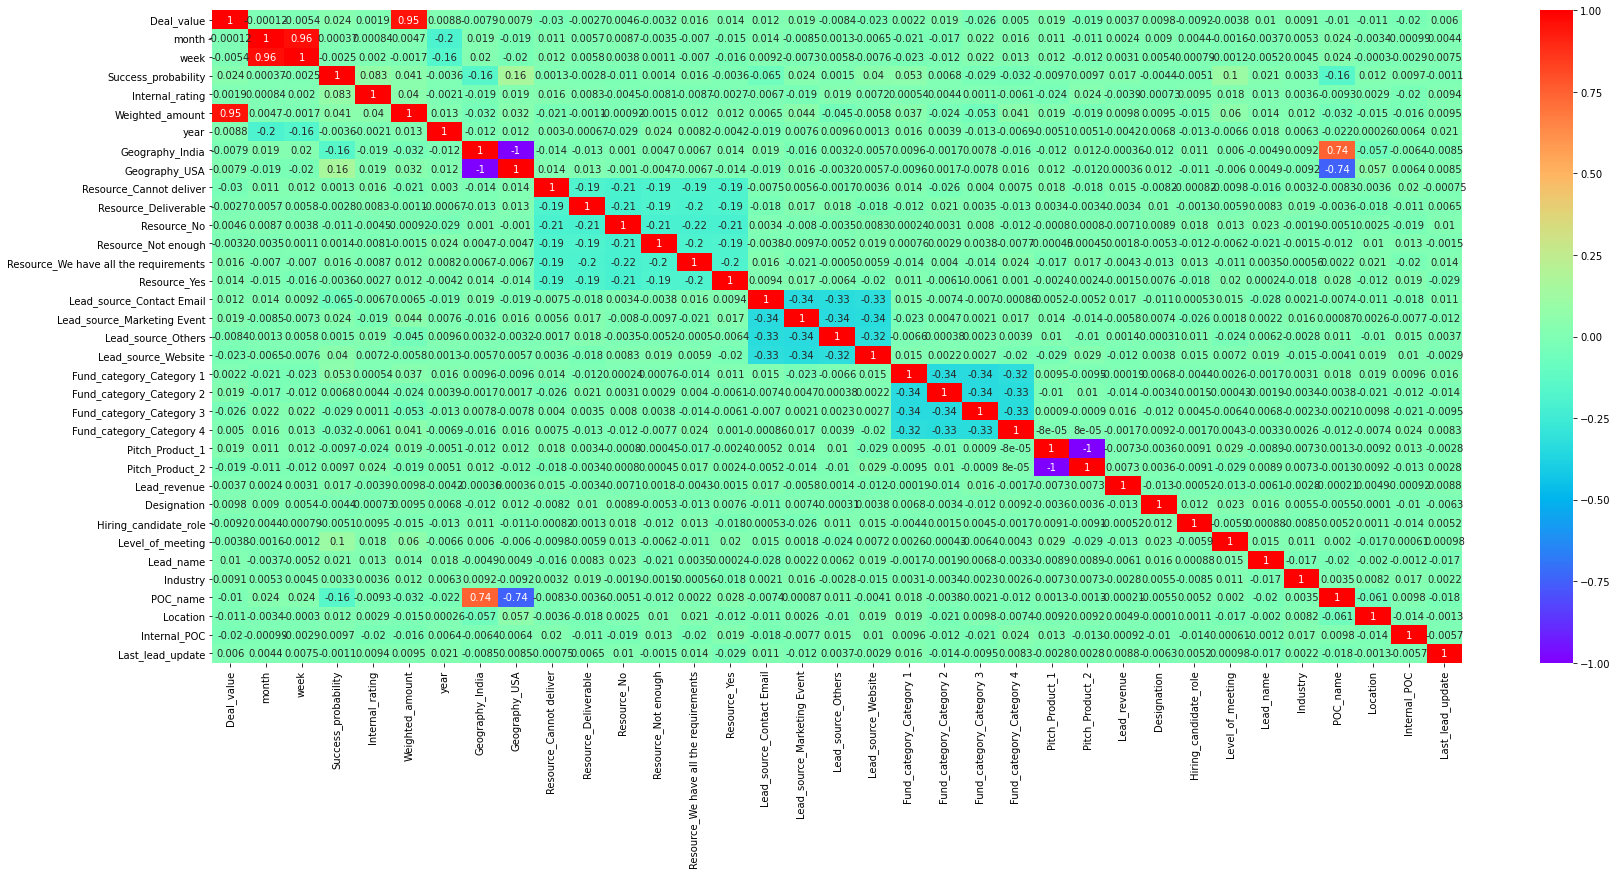

In [48]:
plt.figure(figsize = (28,12))
sns.heatmap(df_final[index].corr(),annot = True,cmap = 'rainbow')

<AxesSubplot:title={'center':'High Correlation'}>

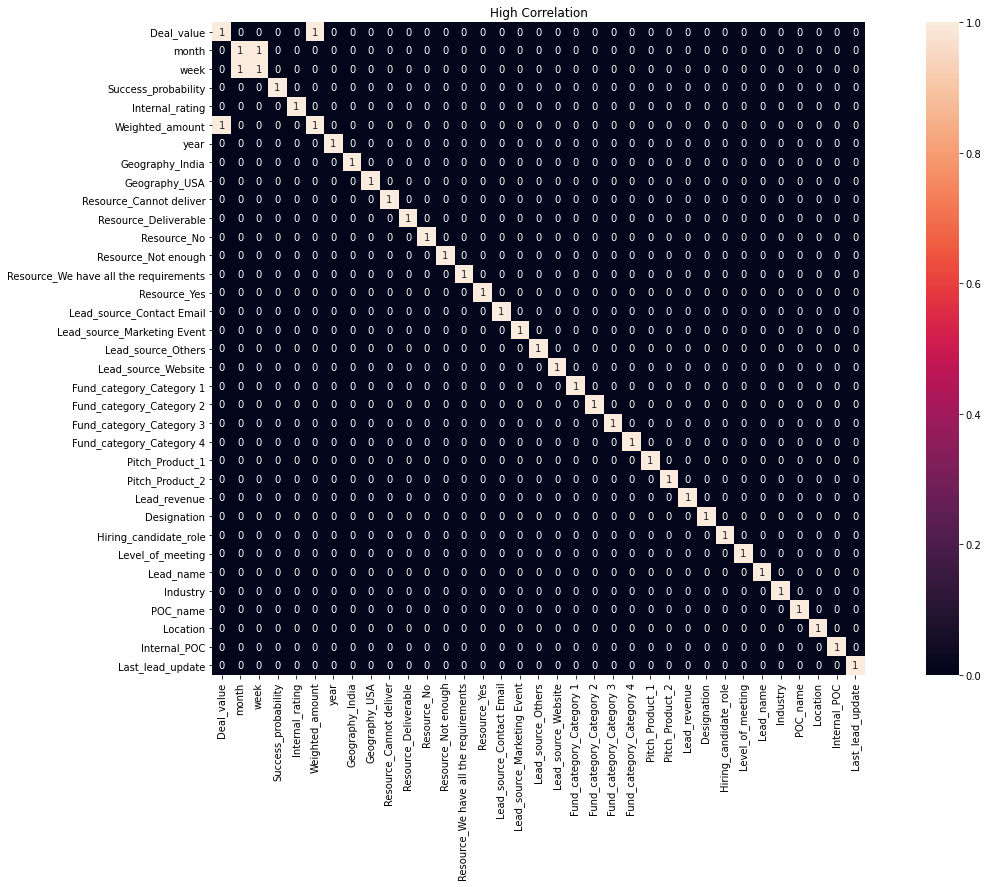

In [49]:
plt.figure(figsize=(22,12))
plt.title('High Correlation')
sns.heatmap(df_corr > 0.8, annot=True, square=True)

In [50]:
corr = df_corr.corr()
cdf = pd.DataFrame(pd.concat([abs(df_corr['Success_probability']),abs(corr['Success_probability'])],\
                             axis='columns'))
cdf.columns = ['corr(x)','corr(corr(x))']
cdf.sort_values(by='corr(x)',axis=0,ascending=False)

,corr(x),corr(corr(x))
Success_probability,1.000000,1.000000
POC_name,0.160934,0.388229
Geography_India,0.160829,0.373800
Geography_USA,0.160829,0.373800
Level_of_meeting,0.103042,0.163542
Internal_rating,0.082645,0.137007
Lead_source_Contact Email,0.064895,0.126291
Fund_category_Category 1,0.053482,0.095913
Weighted_amount,0.041097,0.046540
Lead_source_Website,0.039513,0.079795


In [101]:
df_final.to_csv('Train_Preprocessed.csv',index=False)

In [102]:
import pickle

In [103]:
pickle.dump(Encoders, open('Encoders.pkl', 'wb'))